# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime 
from datetime import date 
import pprint as pp
# Import API key
from config import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
    
#Print the city count to confirm sufficient count
print(len(cities))
#print(cities)
cities_df=pd.DataFrame(cities)
cities_df.to_csv(output_data_file)
cities_df=cities_df.rename(columns={0:"City"})
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Long"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""





#del cities_df[0]

#cities_df["cities"][0]

585


In [3]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,vaini,,,,,,,,
1,itarema,,,,,,,,
2,dukat,,,,,,,,
3,codrington,,,,,,,,
4,poum,,,,,,,,


In [4]:

temp = []
#str=query_url + cities_df["City"][0]
#city1="vaitupu"
#print(str)
#response = requests.get(query_url + city1).json()
#print(response)
#pp.pprint(response)

#print(response["name"])
#print(response["clouds"]["all"])
#print(response["sys"]["country"])
#print(response["dt"])
#print(response["main"]["humidity"])
#print(response["coord"]["lat"])
#print(response["coord"]["lon"])
#print(response["main"]["temp_max"])
#print(response["wind"]["speed"])
#print(response["main"]["pressure"])
ctycntr=1
setcnt =1
#print(response[""])
for index, row in cities_df.iterrows():
    city = row['City']
    
    if (ctycntr%50)==0:
        #print(ctycntr%50)
        ctycntr=1
        setcnt +=1
    else:
        ctycntr+=1 
    response = requests.get(query_url + city).json()
    print(f"Processing Record {ctycntr-1} of Set {setcnt} | {city} ")
    #print(query_url + city)
    if response["cod"]!="404" and response["cod"]!="500" :
        cities_df.loc[index, "Cloudiness"]=response["clouds"]["all"]
        #cities_df["Cloudiness"]=response["clouds"]["all"]
        cities_df.loc[index, "Country"]=response["sys"]["country"]
        #cities_df["Country"]=response["sys"]["country"]
        current_date=datetime.datetime.fromtimestamp(response["dt"]).strftime("%x")
        cities_df.loc[index, "Date"]=response["dt"]
        #cities_df["Date"]=response["dt"]
        cities_df.loc[index, "Humidity"]=response["main"]["humidity"]
        #cities_df["Humidity"]=response["main"]["humidity"]
        cities_df.loc[index, "Lat"]=float(response["coord"]["lat"])
        #cities_df["Lat"]=response["coord"]["lat"]
        cities_df.loc[index, "Long"]=response["coord"]["lon"]
        #cities_df["Long"]=response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]=float(response["main"]["temp_max"])
        #cities_df["Max Temp"]=response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"]=response["wind"]["speed"]
        #cities_df["Wind Speed"]=response["wind"]["speed"]
    else:
        print("City Not Found")
        
#Processing Record 1 of Set 1 | lompoc

 #   lat.append(response['coord']['lat'])
 #   temp.append(response['main']['temp'])

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")



Processing Record 1 of Set 1 | vaini 
Processing Record 2 of Set 1 | itarema 
Processing Record 3 of Set 1 | dukat 
Processing Record 4 of Set 1 | codrington 
Processing Record 5 of Set 1 | poum 
Processing Record 6 of Set 1 | butaritari 
Processing Record 7 of Set 1 | talnakh 
Processing Record 8 of Set 1 | port alfred 
Processing Record 9 of Set 1 | bingol 
Processing Record 10 of Set 1 | aktash 
City Not Found
Processing Record 11 of Set 1 | busselton 
Processing Record 12 of Set 1 | mount gambier 
Processing Record 13 of Set 1 | develi 
Processing Record 14 of Set 1 | necochea 
Processing Record 15 of Set 1 | barrow 
Processing Record 16 of Set 1 | brae 
Processing Record 17 of Set 1 | atuona 
Processing Record 18 of Set 1 | mataura 
Processing Record 19 of Set 1 | cidreira 
Processing Record 20 of Set 1 | tasiilaq 
Processing Record 21 of Set 1 | tuktoyaktuk 
Processing Record 22 of Set 1 | saint george 
Processing Record 23 of Set 1 | southbridge 
Processing Record 24 of Set 1 | 

Processing Record 42 of Set 4 | kargasok 
Processing Record 43 of Set 4 | kiama 
Processing Record 44 of Set 4 | san cristobal 
Processing Record 45 of Set 4 | cape town 
Processing Record 46 of Set 4 | meulaboh 
Processing Record 47 of Set 4 | walvis bay 
Processing Record 48 of Set 4 | xinyu 
Processing Record 49 of Set 4 | chulym 
Processing Record 0 of Set 5 | port keats 
Processing Record 1 of Set 5 | casper 
Processing Record 2 of Set 5 | tres arroyos 
Processing Record 3 of Set 5 | luderitz 
Processing Record 4 of Set 5 | port hardy 
Processing Record 5 of Set 5 | alofi 
Processing Record 6 of Set 5 | kungurtug 
Processing Record 7 of Set 5 | souris 
Processing Record 8 of Set 5 | tandil 
Processing Record 9 of Set 5 | saquena 
Processing Record 10 of Set 5 | bethel 
Processing Record 11 of Set 5 | shymkent 
Processing Record 12 of Set 5 | toliary 
City Not Found
Processing Record 13 of Set 5 | mys shmidta 
City Not Found
Processing Record 14 of Set 5 | artyk 
City Not Found
Pro

Processing Record 31 of Set 8 | olden 
Processing Record 32 of Set 8 | tabiauea 
City Not Found
Processing Record 33 of Set 8 | miri 
Processing Record 34 of Set 8 | kenai 
Processing Record 35 of Set 8 | duz 
City Not Found
Processing Record 36 of Set 8 | bacuit 
City Not Found
Processing Record 37 of Set 8 | wilkie 
Processing Record 38 of Set 8 | krasnoselkup 
City Not Found
Processing Record 39 of Set 8 | erfurt 
Processing Record 40 of Set 8 | altay 
Processing Record 41 of Set 8 | port victoria 
Processing Record 42 of Set 8 | ozinki 
Processing Record 43 of Set 8 | vacaresti 
Processing Record 44 of Set 8 | taranagar 
Processing Record 45 of Set 8 | neyvo-rudyanka 
Processing Record 46 of Set 8 | chipinge 
Processing Record 47 of Set 8 | wanaka 
Processing Record 48 of Set 8 | choix 
Processing Record 49 of Set 8 | cherskiy 
Processing Record 0 of Set 9 | preston 
Processing Record 1 of Set 9 | mayskiy 
Processing Record 2 of Set 9 | arman 
Processing Record 3 of Set 9 | oda 
Pr

Processing Record 19 of Set 12 | camposampiero 
Processing Record 20 of Set 12 | sinkat 
City Not Found
Processing Record 21 of Set 12 | peleduy 
Processing Record 22 of Set 12 | yerbogachen 
Processing Record 23 of Set 12 | russell 
Processing Record 24 of Set 12 | lebedinyy 
Processing Record 25 of Set 12 | catabola 
Processing Record 26 of Set 12 | villa carlos paz 
Processing Record 27 of Set 12 | toulon 
Processing Record 28 of Set 12 | rio gallegos 
Processing Record 29 of Set 12 | nurota 
Processing Record 30 of Set 12 | mardin 
Processing Record 31 of Set 12 | beringovskiy 
Processing Record 32 of Set 12 | ulaanbaatar 
Processing Record 33 of Set 12 | madimba 
Processing Record 34 of Set 12 | bayir 
Processing Record 35 of Set 12 | lahij 


In [12]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,vaini,64.0,IN,1545417023,95.0,15.34,74.49,68.84,2.39
1,itarema,20.0,BR,1545416434,60.0,-2.92,-39.92,89.41,14.47
2,dukat,0.0,RS,1545417024,94.0,42.44,22.31,25.60,1.72
3,codrington,40.0,AU,1545415200,94.0,-28.95,153.24,71.60,11.41
4,poum,75.0,MK,1545415200,86.0,41.28,20.71,37.40,3.36


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
cities_df.to_csv("cities_fullframe.csv")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,vaini,64.0,IN,1545417023,95.0,15.34,74.49,68.84,2.39
1,itarema,20.0,BR,1545416434,60.0,-2.92,-39.92,89.41,14.47
2,dukat,0.0,RS,1545417024,94.0,42.44,22.31,25.60,1.72
3,codrington,40.0,AU,1545415200,94.0,-28.95,153.24,71.60,11.41
4,poum,75.0,MK,1545415200,86.0,41.28,20.71,37.40,3.36


In [14]:
cities_df["Lat"]=pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"]=pd.to_numeric(cities_df["Max Temp"])
cities_df["Humidity"]=pd.to_numeric(cities_df["Humidity"])
cities_df["Wind Speed"]=pd.to_numeric(cities_df["Wind Speed"])
cities_df["Cloudiness"]=pd.to_numeric(cities_df["Cloudiness"])
ymax=cities_df["Max Temp"].max()+10
ymin=cities_df["Max Temp"].min()-10
xmax=cities_df["Lat"].max()+10
xmin=cities_df["Lat"].min()+10



#cities_df["Date"]=pd.to_float(cities_df["Date"])
#cities_df["Date"]=
#print(time.ctime(cities_df["Date"]))
#print(datetime.datetime.fromtimestamp(date.now()).strftime("%x"))
#print(datetime.datetime(cities_df["Date"].year, cities_df["Date"].month, cities_df["Date"].day))
#print(datetime.datetime.fromtimestamp((cities_df["Date"])))

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

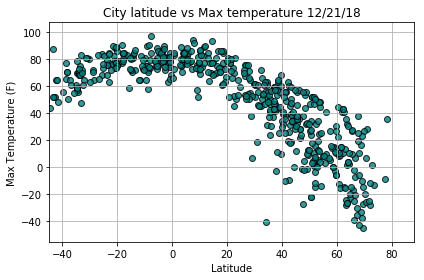

In [15]:
#plt.figure(figsize=(8,8))
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City latitude vs Max temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Max Temp"],marker="o", alpha=.8,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
plt.tight_layout()

plt.savefig("latitude_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

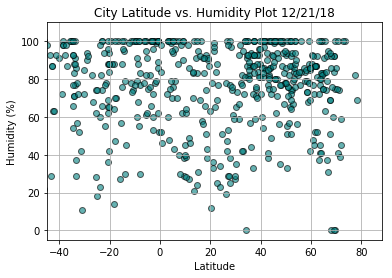

In [16]:
#plt.figure(figsize=(10,8))
ymax=100+10
ymin=cities_df["Humidity"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Humidity Plot {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Humidity"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
#plt.tight_layout()

plt.savefig("latitude_Humidty.png")
plt.show()

#### Latitude vs. Cloudiness Plot

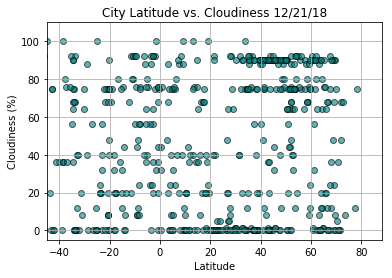

In [17]:
#plt.figure(figsize=(10,8))
ymax=cities_df["Cloudiness"].max()+10
ymin=cities_df["Cloudiness"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
#plt.tight_layout()

plt.savefig("latitude_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

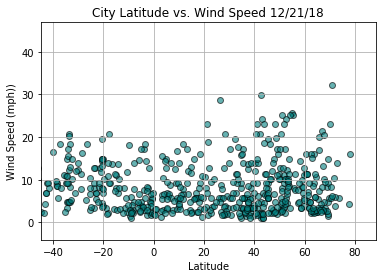

In [18]:
#plt.figure(figsize=(10,8))
ymax=cities_df["Wind Speed"].max()+10
ymin=cities_df["Wind Speed"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")

plt.scatter(cities_df["Lat"], cities_df["Wind Speed"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
#plt.tight_layout()


plt.savefig("latitude_Wind_Speed.png")
plt.show()